# [Data Preprocessing]
### ML을 하기 위해 해야 하는 것들
- 데이터 나누기 : Train, Validation, Test
- 데이터 전처리 하기
    - 탐색적 자료 분석
    - 피쳐 엔지니어링
- 태도 : ML의 코드는 전체 시스템에서 아주 일부.. 따라서 알고리즘 하나하나를 아주 깊이 이해하기보단(물론 이것도 좋지만) 그걸 이용,구현할 줄 아는 능력, 때로는 시각적 이해를 돕는 스킬의 중요성이 더 클 때도 많다.

In [195]:
from IPython.display import Image
import warnings
warnings.filterwarnings(action='ignore')

### [Data acquisition]
#### 1. 모판 만들기, train, test데이터 나누기
- 전체 데이터를 한 판의 데이터 모판으로 만들자(전처리 과정이 완료된)
- traing과 test 데이터셋의 각 컬럼에는 같은 전처리 적용
- 실제 서비스에선 모델생성시 사용한 전처리를 그래도 활용한다.

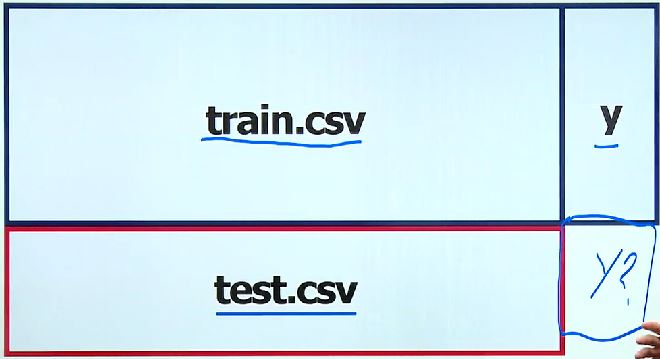

In [196]:
# 모판만들기
Image("C:/Users/hyun/workspace/TIL/MachineLearning/0_references/images/5_데이터나누기.JPG")

#### 1-1. 모판에서 y데이터만 제거하여 따로 관리(train과 test데이터의 위치는 기억)

In [197]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style = "white")
sns.set(style = "whitegrid", color_codes = True)

In [198]:
DATA_DIR = "0_references/data/titanic"
# 폴더에 test, train 순서로 들어가있길래 reversed로 train, test순서로해서 data_files만듦
data_files = reversed([os.path.join(DATA_DIR, filename) for filename in os.listdir(DATA_DIR)])
df_list = []
# df_list train, test csv 넣어줌
for filename in data_files:
    df_list.append(pd.read_csv(filename))
# concat을 통해 위에 나왔던 이미지처럼 한 판으로 만들어줌
df = pd.concat(df_list, sort=False)
# train, test데이터셋을 붙이다보니 인덱스가 이상함, 그래서 reset_index, drop=True해야 인덱스하나서 밖으로 안나옴, 모르겠으면 실험 ㄱ
df = df.reset_index(drop=True)
#df = train,test데이터가 다 합쳐진 한 판

# Survived열이 notnull인거 세서 number_of_train_dataset로 지정
number_of_train_dataset = df.Survived.notnull().sum()
number_of_test_dataset = df.Survived.isnull().sum()

# target 분리
y_true = df.pop("Survived")[:number_of_train_dataset]
y_true

0     0.000000
1     1.000000
2     1.000000
3     1.000000
4     0.000000
        ...   
886   0.000000
887   1.000000
888   0.000000
889   1.000000
890   0.000000
Name: Survived, Length: 891, dtype: float64

## 데이터 처리의 전략
- 모판은 흔들지 않는다.
- !!! 하나의 셀은 다시 실행해도 그 결과가 보장되야 한다.
- 전처리가 완료 후 함수화한다 (merge 함수 필수)
- 컬럼이름은 list로 관리하기! 직접입력 X
- 데이터는 타입별로 분리해서 관리하기 !
- 데이터 노트 작성하기 !!! (추후 컬럼수가 많은 데이터 다룰 때 각 컬럼에 대한 설명이라든지, 특정 컬럼을 이용할지 말지의 여부 등 모든 내용)

### [데이터 노트]
- 데이터에 대한 처리 내용 및 방향을 정리한 노트, 앞으로 어떻게 데이터 분석을 진행할지에 대한 계획
- 기본적인 전처리 방향과 방법들을 정리함
- 데이터에 대한 아이디어를 정리와 지속적인 업데이트
- 추후 다른 팀원이 봐도 알아볼 수 있게끔 적는다.

### 기본적인 데이터 현황 파악 코드
- df.dtypes()
- df.info()
- df.isnull().sum()
- df.describe()
- df.head(2).T
- 등등등

In [199]:
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [200]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

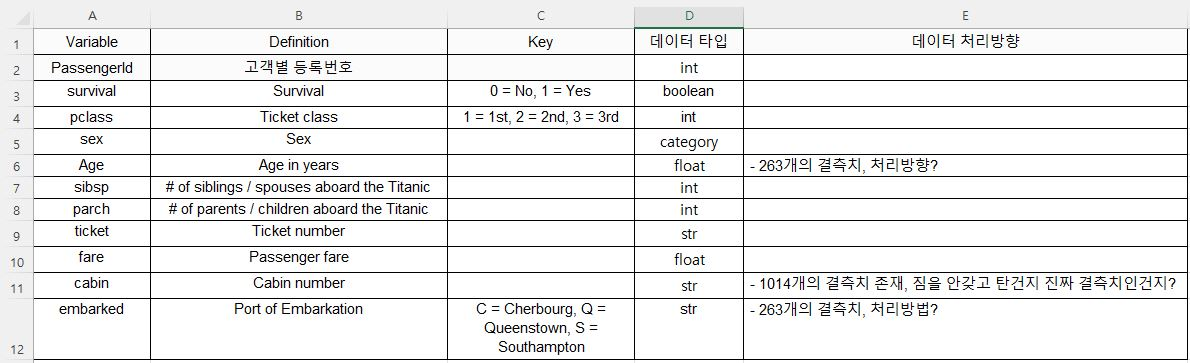

In [201]:
# 데이터노트
Image("C:/Users/hyun/workspace/TIL/MachineLearning/0_references/images/5_데이터노트.JPG")

- variable이름이나 definition 같은거는 데이터 딕셔너리 참고하고
- 데이터 타입파악 후
- 결측치 등을 확인하여 추후 데이터를 어떤식으로 분석할지, 결측치는 어떻게 처리할지 등 모든 내용을 적는다.

## [Data Cleansing issues]
- 데이터가 빠진 경우 (결측치의 처리)
- 라벨링된 데이터(category)데이터의 처리
- 데이터의 scale의 차이가 매우 크게 날 경우

## [Missing Value Strategy]

In [202]:
# 예시 데이터 만들기
raw_data = {'first_name' : ['Jason', np.nan, 'Tina', 'Jake', 'Amy'],
            'last_name' : ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'],
            'age' : [42, np.nan, 36, 24, 73],
            'sex' : ['m', np.nan, 'f', 'm', 'f'],
            'preTestScore' : [4, np.nan, np.nan, 2, 3],
            'postTestScore' : [25, np.nan, np.nan, 62, 70]}
df = pd.DataFrame(raw_data, columns=['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.000000,m,4.000000,25.000000
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.000000,f,NaN,NaN
3,Jake,Milner,24.000000,m,2.000000,62.000000
4,Amy,Cooze,73.000000,f,3.000000,70.000000


In [203]:
# missing value 몇개인지 퍼센트로 확인
df.isnull().sum() / len(df)

first_name      0.200000
last_name       0.200000
age             0.200000
sex             0.200000
preTestScore    0.400000
postTestScore   0.400000
dtype: float64

In [204]:
# thresh= ~~ : NaN값이 ~~개 이상인거만 드랍
df.dropna(thresh=1)

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.000000,m,4.000000,25.000000
2,Tina,Ali,36.000000,f,NaN,NaN
3,Jake,Milner,24.000000,m,2.000000,62.000000
4,Amy,Cooze,73.000000,f,3.000000,70.000000


In [205]:
df_no_missing = df.dropna()
df_no_missing

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.000000,m,4.000000,25.000000
3,Jake,Milner,24.000000,m,2.000000,62.000000
4,Amy,Cooze,73.000000,f,3.000000,70.000000


In [206]:
df_cleaned = df.dropna(how='all')
df_cleaned

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.000000,m,4.000000,25.000000
2,Tina,Ali,36.000000,f,NaN,NaN
3,Jake,Milner,24.000000,m,2.000000,62.000000
4,Amy,Cooze,73.000000,f,3.000000,70.000000


In [207]:
df['location'] = np.nan
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.000000,m,4.000000,25.000000,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.000000,f,NaN,NaN,NaN
3,Jake,Milner,24.000000,m,2.000000,62.000000,NaN
4,Amy,Cooze,73.000000,f,3.000000,70.000000,NaN


In [208]:
# axis로 지정해줄수도 있음
df.dropna(axis=1, how='all')

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.000000,m,4.000000,25.000000
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.000000,f,NaN,NaN
3,Jake,Milner,24.000000,m,2.000000,62.000000
4,Amy,Cooze,73.000000,f,3.000000,70.000000


### [데이터 값 채우기]
- 평균값, 중위값, 최빈값 활용

- 평균값 : 해당 column의 값의 평균을 내서 채우기
df["preTestScore"].mean()
<br?
- 중위값 : 값을 일렬로 나열했을 때 중간에 위치한 값
df["postTestScore"].median()
<br>
- 최빈값 : 가장 많이 나오는 값
df["postTestScore"].mode()

In [209]:
# NaN값들 0으로 채우기
df.fillna(0)

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.000000,m,4.000000,25.000000,0.000000
1,0,0,0.000000,0,0.000000,0.000000,0.000000
2,Tina,Ali,36.000000,f,0.000000,0.000000,0.000000
3,Jake,Milner,24.000000,m,2.000000,62.000000,0.000000
4,Amy,Cooze,73.000000,f,3.000000,70.000000,0.000000


In [210]:
cleaned_df = df.dropna(axis=1, how="all")
cleaned_df = cleaned_df.dropna(axis=0, how="all")
cleaned_df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.000000,m,4.000000,25.000000
2,Tina,Ali,36.000000,f,NaN,NaN
3,Jake,Milner,24.000000,m,2.000000,62.000000
4,Amy,Cooze,73.000000,f,3.000000,70.000000


In [211]:
df["preTestScore"].mean()

3.0

In [212]:
df["postTestScore"].median()

62.0

In [213]:
df["postTestScore"].mode()

0   25.000000
1   62.000000
2   70.000000
Name: postTestScore, dtype: float64

In [214]:
# 위의 과정으로 postTestScore열의 NaN값에 어떤걸 채울지 결정
df["preTestScore"].fillna(df["preTestScore"].mean())

0   4.000000
1   3.000000
2   3.000000
3   2.000000
4   3.000000
Name: preTestScore, dtype: float64

In [215]:
fillna_df = cleaned_df.copy()
fillna_df["preTestScore"] = cleaned_df["preTestScore"].fillna(cleaned_df["preTestScore"])
fillna_df["preTestScore"]
fillna_df["postTestScore"] = cleaned_df["postTestScore"].fillna(cleaned_df.groupby("sex")["postTestScore"].transform("mean"))
fillna_df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.000000,m,4.000000,25.000000
2,Tina,Ali,36.000000,f,NaN,70.000000
3,Jake,Milner,24.000000,m,2.000000,62.000000
4,Amy,Cooze,73.000000,f,3.000000,70.000000


In [216]:
# 성별별로 posttestScore 확인
cleaned_df.groupby("sex")["postTestScore"].transform("mean")

0   43.500000
2   70.000000
3   43.500000
4   70.000000
Name: postTestScore, dtype: float64

In [217]:
df.groupby("sex")["postTestScore"].transform("mean")

0   43.500000
1         NaN
2   70.000000
3   43.500000
4   70.000000
Name: postTestScore, dtype: float64

#### [Titanic 데이터로 실습]

In [218]:
df = pd.read_csv("C:/Users/hyun/workspace/TIL/MachineLearning/0_references/data/titanic/train.csv")
pd.options.display.float_format = '{:2f}'.format
# 비율로써 null값 확인
df.isnull().sum() / len(df) * 100

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age           19.865320
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin         77.104377
Embarked       0.224467
dtype: float64

In [219]:
# Age 열에 빈 값이 많으니 채워보자
# 일단 성별별 나이 평균 확인
df[df["Age"].notnull()].groupby(["Sex"])["Age"].mean()
# null 값을 채우기엔 크게 의미없음

Sex
female   27.915709
male     30.726645
Name: Age, dtype: float64

In [220]:
# Pclas별 나이 평균
df[df["Age"].notnull()].groupby(["Pclass"])["Age"].mean()

Pclass
1   38.233441
2   29.877630
3   25.140620
Name: Age, dtype: float64

In [221]:
# Pclass별로 transform으로 비워져있는애 채우자
df["Age"].fillna(df.groupby("Pclass")["Age"].transform("mean"), inplace=True)
df.isnull().sum() / len(df) * 100
# 나이는 일단 다 채움

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin         77.104377
Embarked       0.224467
dtype: float64

In [222]:
df.groupby("Pclass")["Age"].transform("mean")

0     25.140620
1     38.233441
2     25.140620
3     38.233441
4     25.140620
         ...   
886   29.877630
887   38.233441
888   25.140620
889   38.233441
890   25.140620
Name: Age, Length: 891, dtype: float64

## [Category Data]
## [이산형 데이터 처리]

### [One-Hot Encoding]

In [223]:
edges = pd.DataFrame({'source' : [0, 1, 2],
                    'target' : [2, 2, 3],
                    'weight' : [3, 4, 5],
                    'color' : ['red', 'blue', 'blue']})
edges
# color열 one-hot endcoding 시킬예정

,source,target,weight,color
0,0,2,3,red
1,1,2,4,blue
2,2,3,5,blue


In [224]:
edges.dtypes
# object 형식의 color를 one-hot encoding 시키자

source     int64
target     int64
weight     int64
color     object
dtype: object

In [225]:
# 방법1 : 바로 one-hot encoding
pd.get_dummies(edges)

,source,target,weight,color_blue,color_red
0,0,2,3,0,1
1,1,2,4,1,0
2,2,3,5,1,0


In [226]:
# 방식 2 : concat해서 df에 붙여버리고 axis 지정해서 옆으로 붙이자
pd.concat([edges, pd.get_dummies(edges["color"])], axis=1)

,source,target,weight,color,blue,red
0,0,2,3,red,0,1
1,1,2,4,blue,1,0
2,2,3,5,blue,1,0


In [227]:
pd.get_dummies(edges["color"])

,blue,red
0,0,1
1,1,0
2,1,0


In [228]:
# column명도 붙게 나와서 df로 만들어버는 방법
pd.get_dummies(edges[["color"]])

,color_blue,color_red
0,0,1
1,1,0
2,1,0


In [229]:
pd.merge(edges, pd.get_dummies(edges[["color"]]), left_index=True, right_index=True)

,source,target,weight,color,color_blue,color_red
0,0,2,3,red,0,1
1,1,2,4,blue,1,0
2,2,3,5,blue,1,0


### [기수형 데이터(순서가 있는 데이터)]

In [230]:
weight_dict = {3 : "M", 4 : "L", 5 : "XL"}
edges["weight_sign"] = edges["weight"].map(weight_dict)
edges
# 일단 순서가 있는 데이터를 object형태로 넣어줌

,source,target,weight,color,weight_sign
0,0,2,3,red,M
1,1,2,4,blue,L
2,2,3,5,blue,XL


In [231]:
# 이렇게 get_dummise가능
weight_sign = pd.get_dummies(edges["weight_sign"])
weight_sign

,L,M,XL
0,0,1,0
1,1,0,0
2,0,0,1


In [232]:
# 괄호 한번 더 쳐주면 df형태로 나옴
weight_sign = pd.get_dummies(edges[["weight_sign"]])
weight_sign

,weight_sign_L,weight_sign_M,weight_sign_XL
0,0,1,0
1,1,0,0
2,0,0,1


### [데이터의 구간을 나눠보자] - Data Binning !

In [233]:
raw = {'regiment' : ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 
'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scounts','Scounts','Scounts','Scounts'],
'company' : ['1st','1st','2nd','2nd','1st','1st','2nd','2nd','1st','1st','2nd','2nd'],
'name' : ["Miller", "Jacobson","Ali",'Miner','Cooze','Jacon','Ryaner','Sone','Sloan','Piger','Riani','Ali'],
'preTestScore':[4,24,31,2,3,4,24,31,2,3,2,3],
'postTestScore' : [25,94,57,62,70,25,94,57,62,80,62,70]}
df = pd.DataFrame(raw, columns=['regiment','company','name','preTestScore','postTestScore'])
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Miner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scounts,1st,Sloan,2,62
9,Scounts,1st,Piger,3,80


<AxesSubplot:>

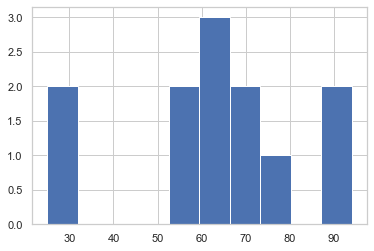

In [234]:
# 나누고자 하는 데이터의 히스토그램 한 번 보고 나눌 구간 정해보자
df["postTestScore"].hist()

In [235]:
# 데이터의 구간에 따라 나눌 부분 정함
bins = [0, 50, 80, 100]
group_names = ["Low", "Good", "Great"]
categories = pd.cut(df['postTestScore'], bins, labels=group_names)
categories

0       Low
1     Great
2      Good
3      Good
4      Good
5       Low
6     Great
7      Good
8      Good
9      Good
10     Good
11     Good
Name: postTestScore, dtype: category
Categories (3, object): ['Low' < 'Good' < 'Great']

In [236]:
# df에 나눈 categories 넣어줌
df['categories'] = pd.cut(df['postTestScore'], bins, labels=group_names)
df

,regiment,company,name,preTestScore,postTestScore,categories
0,Nighthawks,1st,Miller,4,25,Low
1,Nighthawks,1st,Jacobson,24,94,Great
2,Nighthawks,2nd,Ali,31,57,Good
3,Nighthawks,2nd,Miner,2,62,Good
4,Dragoons,1st,Cooze,3,70,Good
5,Dragoons,1st,Jacon,4,25,Low
6,Dragoons,2nd,Ryaner,24,94,Great
7,Dragoons,2nd,Sone,31,57,Good
8,Scounts,1st,Sloan,2,62,Good
9,Scounts,1st,Piger,3,80,Good


In [237]:
# 마무리로 get_dummies 쓰면 다 구분되긴함(너무 복잡해지지 않도록 주의)
pd.get_dummies(df)

,preTestScore,postTestScore,regiment_Dragoons,regiment_Nighthawks,regiment_Scounts,company_1st,company_2nd,name_Ali,name_Cooze,name_Jacobson,...,name_Miller,name_Miner,name_Piger,name_Riani,name_Ryaner,name_Sloan,name_Sone,categories_Low,categories_Good,categories_Great
0,4,25,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,24,94,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,31,57,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2,62,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,3,70,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,4,25,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,24,94,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
7,31,57,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
8,2,62,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
9,3,80,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


## [Label encoding by sklearn]
- 문자인 데이터를 숫자로 변형시켜줌
- Scikit-learn의 preprocessing 패키지도 label / one-hot 지원

### [sklearn]
- 맨 처음 Labelencoder라는 틀을 만들어냄
- Fit : 규칙을 생성하는 과정
- Transform : 규칙을 적용하는 과정
- fit과 transform의 과정이 나눠진 이유 : 새로운 데이터 입력시, 기존 labeling규칙을 그대로 적용할 필요가 있음
- Fit을 통해 규칙이 생성된 labelencoder는 따로 저장하여 새로운 데이터를 입력할 경우 사용
- Encoder들을 실제 시스템에 사용할 경우 pickle화 필요

In [238]:
# using scikit-learn preprocessing
# 판다스 데이터를 넘파이로 바꿔줌
raw_example = df.values
raw_example[:3]

array([['Nighthawks', '1st', 'Miller', 4, 25, 'Low'],
       ['Nighthawks', '1st', 'Jacobson', 24, 94, 'Great'],
       ['Nighthawks', '2nd', 'Ali', 31, 57, 'Good']], dtype=object)

In [239]:
data = raw_example.copy()

In [240]:
# sklearn의 preprocessing 임포트하고 LabelEncoder만들어줌
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [241]:
data[:, 0]

array(['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons',
       'Dragoons', 'Dragoons', 'Dragoons', 'Scounts', 'Scounts',
       'Scounts', 'Scounts'], dtype=object)

In [242]:
# 주어진 데이터를 le에 피팅시킴
le.fit(data[:, 0])

LabelEncoder()

In [243]:
# 피팅을 통해 생성된 class들, 어떤 값들을 변형시켜 줄건지
le.classes_

array(['Dragoons', 'Nighthawks', 'Scounts'], dtype=object)

In [244]:
le.transform(raw_example[:, 0])

array([1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2])

In [245]:
# data의 0번째 값들 다 변경됨
data[:, 0] = le.transform(raw_example[:,0])
data

array([[1, '1st', 'Miller', 4, 25, 'Low'],
       [1, '1st', 'Jacobson', 24, 94, 'Great'],
       [1, '2nd', 'Ali', 31, 57, 'Good'],
       [1, '2nd', 'Miner', 2, 62, 'Good'],
       [0, '1st', 'Cooze', 3, 70, 'Good'],
       [0, '1st', 'Jacon', 4, 25, 'Low'],
       [0, '2nd', 'Ryaner', 24, 94, 'Great'],
       [0, '2nd', 'Sone', 31, 57, 'Good'],
       [2, '1st', 'Sloan', 2, 62, 'Good'],
       [2, '1st', 'Piger', 3, 80, 'Good'],
       [2, '2nd', 'Riani', 2, 62, 'Good'],
       [2, '2nd', 'Ali', 3, 70, 'Good']], dtype=object)

In [246]:
# 카테로리컬한 값들을 뉴메릭하게 변형해보자, 위 셀과 비교
label_column = [0, 1, 2, 5]
label_encoder_list = []
for column_index in label_column : 
    le = preprocessing.LabelEncoder()
    le.fit(raw_example[:, column_index])
    data[:, column_index] = le.transform(raw_example[:, column_index])
    label_encoder_list.append(le)
    del le
data

array([[1, 0, 4, 4, 25, 2],
       [1, 0, 2, 24, 94, 1],
       [1, 1, 0, 31, 57, 0],
       [1, 1, 5, 2, 62, 0],
       [0, 0, 1, 3, 70, 0],
       [0, 0, 3, 4, 25, 2],
       [0, 1, 8, 24, 94, 1],
       [0, 1, 10, 31, 57, 0],
       [2, 0, 9, 2, 62, 0],
       [2, 0, 6, 3, 80, 0],
       [2, 1, 7, 2, 62, 0],
       [2, 1, 0, 3, 70, 0]], dtype=object)

In [247]:
# label_encoder_list에서 각 원소의 class들은 어떻게 나눠졌었는지 확인
label_encoder_list[3].classes_

array(['Good', 'Great', 'Low'], dtype=object)

In [248]:
label_encoder_list[0].transform(raw_example[:10, 0])

array([1, 1, 1, 1, 0, 0, 0, 0, 2, 2])

In [249]:
# OneHotEncoder도 있음
one_hot_enc = preprocessing.OneHotEncoder()
data[:, 0].reshape(-1,1)

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2]], dtype=object)

In [250]:
one_hot_enc.fit(data[:, 0].reshape(-1,1))

OneHotEncoder()

In [251]:
one_hot_enc.categories_

[array([0, 1, 2], dtype=object)]

In [252]:
# one_hot_enc.active_features_

In [253]:
data[:,0].reshape(-1,1)

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2]], dtype=object)

In [254]:
onehotlabels = one_hot_enc.transform(data[:, 0].reshape(-1, 1)).toarray()
onehotlabels

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

### [Titanic데이터에서 One-hot encoding]

In [255]:
df = pd.read_csv("C:/Users/hyun/workspace/TIL/MachineLearning/0_references/data/titanic/train.csv")
# y = df.pop("Survived")

# 항상 df에서 object 형식인거랑 numeric한 거랑 분리 해놓고 정리해두자
object_columns = ["PassengerId", "Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked"]
numeric_columns = [ "Age", "SibSp", "Parch", "Fare"]

In [256]:
# df의 dtypes 확인해보고 PassengerID 같은경우는
# object_column에 있는데 int64형식이니까 바꿔주자
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [257]:
# object타입과 float타입으로 다 통일
for col_name in object_columns : 
    df[col_name] = df[col_name].astype(object)

for col_name in numeric_columns:
    df[col_name] = df[col_name].astype(float)

# Parch, SipSp는 int타입이라 따로 변형시켜줬음 
df["Parch"] = df["Parch"].astype(int)
df["SibSp"] = df["SibSp"].astype(int)

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int32  
 7   Parch        891 non-null    int32  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int32(2), int64(1), object(7)
memory usage: 76.7+ KB


In [259]:
# one-hot encoding한 df를 원래 df에 합쳐주기
# if index=True면 index를 기준으로 합쳐주기
def merge_and_get(ldf, rdf, on, how='inner', index=None):
    if index is True:
        return pd.merge(ldf, rdf, how=how, left_index=True, right_index=True)
    else:
        return pd.merge(ldf, rdf, how=how, on=on)

In [260]:
df.loc[61, "Embarked"] = "S"
df.loc[829, "Embarked"] = "S"

In [261]:
# categoricla한 피쳐들(Sex, Pclass, Embarked) one-hot encoding 시켜서 원래 df에 합쳐주자
one_hot_df = merge_and_get(
    df, pd.get_dummies(df["Sex"], prefix="Sex"), on=None, index=True)
one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(df["Pclass"], prefix="Pclass"), on=None, index=True)
one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(df["Embarked"], prefix="Embarked"), on=None, index=True)

In [262]:
one_hot_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,NaN,S,0,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.283300,C85,C,1,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,NaN,S,1,0,0,0,1,0,0,1


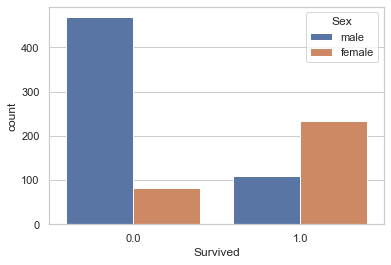

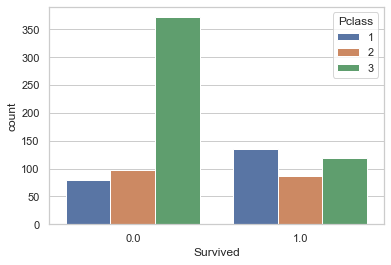

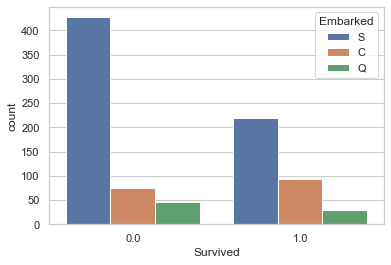

In [263]:
# 리스트 안의 각 피쳐별로 죽었는지 살았는지 알기위해서
temp_columns = ["Sex", "Pclass", "Embarked"]

for col_name in temp_columns:
    temp_df = pd.merge(one_hot_df[col_name], y_true, left_index=True, right_index=True)
    sns.countplot(x='Survived', hue=col_name, data=temp_df)
    plt.show()

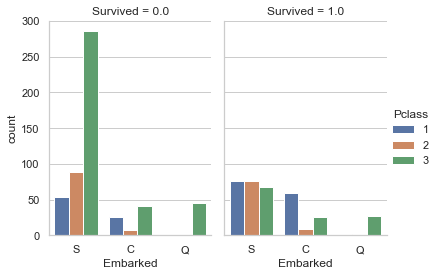

In [264]:
# Pclass에 따른Embarked 확인, Survived는 나뉘어져있고
temp_df = pd.merge(one_hot_df[temp_columns], y_true, left_index=True, right_index=True)
g = sns.catplot(x="Embarked", hue="Pclass", col="Survived",
                data=temp_df, kind="count", height=4, aspect=.7)

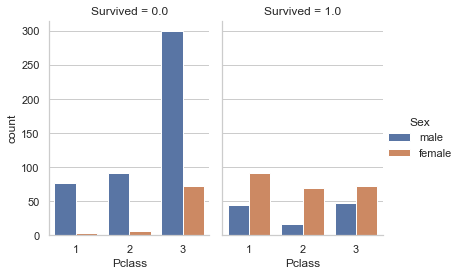

In [265]:
# Sex에 따른 Pclass 확인, Survived는 나뉘어져있고
temp_df = pd.merge(one_hot_df[temp_columns], y_true, left_index=True, right_index=True)
g = sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=temp_df, kind="count", height=4, aspect=.7)

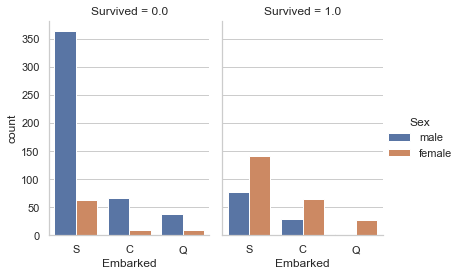

In [266]:
# Sex에 따른 Embarked 확인, Survived는 나뉘어져있고
temp_df = pd.merge(one_hot_df[temp_columns], y_true, left_index=True, right_index=True)
g = sns.catplot(x="Embarked", hue="Sex", col="Survived",
                data=temp_df, kind="count", height=4, aspect=.7)

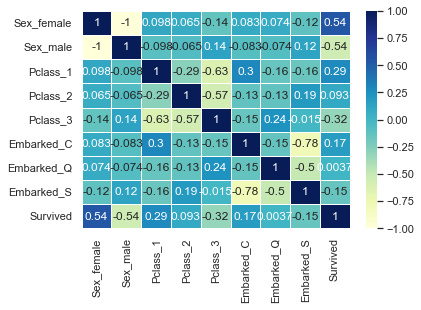

In [267]:
# 각 피쳐간의 상관관계또한 구할수 있음, 맨 오른쪽의 Survived열과 다른 피쳐들 비교해보는게 좋다
crosscheck_columns = [col_name for col_name in one_hot_df.columns.tolist()
                        if col_name.split("_")[0] in temp_columns and "_" in col_name]

#temp_columns
temp_df = pd.merge(one_hot_df[crosscheck_columns], y_true, left_index=True, right_index=True)

corr = temp_df.corr()
sns.set()
ax = sns.heatmap(corr, annot=True, linewidths=.5, cmap="YlGnBu")

## [Feature Scaling]
- 두 변수 중 하나의 값이 너무 크다 !
- 예) 몸무게와 키가 변수일 때, 키가 영향을 많이 줄수도 있다.

### [Min - Max Normalization]
- 기존 변수에 범위를 새로운 최대-최소로 변경. 일반적으로 0과 1사이의 값으로 변경함

### [Standardization (Z - score Normalization)]
- 기존 변수의 범위를 정규 분포로 변환
- 실제 Min - Max의 값을 모를 때 활용가능

### *주의사항
- 실제 사용할 때는 반드시
- 정규화 Parameter(최대 / 최소, 평균 / 표준편차) 기억하여 새로운 값에 적용해야함

In [268]:
df = pd.DataFrame(
    {'A' : [14.00, 90.20, 90.95, 96.27, 91.21], 
     'B' : [103.02, 107.26, 110.35, 114.23, 114.68],
     'C' : ['big', 'small', 'big', 'small', 'small']}
)
df

,A,B,C
0,14.000000,103.020000,big
1,90.200000,107.260000,small
2,90.950000,110.350000,big
3,96.270000,114.230000,small
4,91.210000,114.680000,small


In [269]:
df["A"]

0   14.000000
1   90.200000
2   90.950000
3   96.270000
4   91.210000
Name: A, dtype: float64

In [270]:
df['A'] - df['A'].min()

0    0.000000
1   76.200000
2   76.950000
3   82.270000
4   77.210000
Name: A, dtype: float64

### [Min - Max Scaling]

In [271]:
# 0점 ~ 1점 사이로 Scaling
(df["A"] - df["A"].min()) / (df["A"].max() - df["A"].min())

0   0.000000
1   0.926219
2   0.935335
3   1.000000
4   0.938495
Name: A, dtype: float64

In [272]:
# 1점 ~ 5점 사이로 Scaling
df['A'] = (df['A'] - df['A'].min()) / (df['A'].max() - df['A'].min()) * (5 - 1) + 1
df

,A,B,C
0,1.000000,103.020000,big
1,4.704874,107.260000,small
2,4.741339,110.350000,big
3,5.000000,114.230000,small
4,4.753981,114.680000,small


### [Normalization]

In [273]:
df['B'].mean(), df['B'].std()

(109.90799999999999, 4.901619120249964)

In [274]:
df['B'] = (df['B'] - df['B'].mean()) / (df['B'].std())
df

,A,B,C
0,1.000000,-1.405250,big
1,4.704874,-0.540230,small
2,4.741339,0.090174,big
3,5.000000,0.881749,small
4,4.753981,0.973556,small


In [275]:
# 이렇게 함수화 해서 상황에 따라 정규화 진행해줄수도 있음

def feature_scaling(df, scaling_strategy="min-max", column=None):
    if column == None:
        column = [column_name for column_name in df.columns]
    for column_name in column:
        if scaling_strategy == "min-max":
            df[column_name] = (df[column_name] - df[column_name].min()) / (df[column_name].max() - df[column_name].min())
        elif scaling_strategy == 'z-score':
            df[column_name] = (df[column_name] - df[column_name].mean()) / (df[column_name].std())
    
    return df

## [Feature scaling with sklearn]
- 사실 scaling은 주로 sklearn으로 많이 한다.. 위에 과정들은 잘 안쓰는듯..
- Label encoder와 마찬가지로, sklearn도 feature scale 지원
- MinMaxScaler와 StandardScaler사용

- Preprocessing은 모두 fit -> transform의 과정을 거침
- 이유는 label encoder와 동일
- 단, scaler는 한번에 여러 column을 처리 가능

In [276]:
df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
    header=None,
    usecols=[0,1,2]
    )

df.columns = ['Class label', 'Alcohol', 'Malic acid']

df.head()

,Class label,Alcohol,Malic acid
0,1,14.230000,1.710000
1,1,13.200000,1.780000
2,1,13.160000,2.360000
3,1,14.370000,1.950000
4,1,13.240000,2.590000


In [277]:
# 위에서 만들어준 함수 활용해도 되지만
df = feature_scaling(df, "min-max", column=['Alcohol', 'Malic acid'])
df.head()

,Class label,Alcohol,Malic acid
0,1,0.842105,0.191700
1,1,0.571053,0.205534
2,1,0.560526,0.320158
3,1,0.878947,0.239130
4,1,0.581579,0.365613


In [278]:
# sklearn으로 불러내는게 더 많이 쓰임, 굳이 함수만들어주고 할 필요없다.
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])

In [279]:
df_std = std_scaler.transform(df[['Alcohol', 'Malic acid']])

In [280]:
df_std

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377],
       [ 1.48155459, -0.51736664],
       [ 1.71625494, -0.4186237 ],
       [ 1.3086175 , -0.16727801],
       [ 2.25977152, -0.62508622],
       [ 1.0615645 , -0.88540853],
       [ 1.3580281 , -0.15830138],
       [ 1.38273339, -0.76871232],
       [ 0.92568536, -0.54429654],
       [ 2.16095032, -0.54429654],
       [ 1.70390229, -0.4186237 ],
       [ 0.77745356, -0.47248348],
       [ 1.60508109, -0.37374054],
       [ 1.02450655, -0.68792264],
       [ 1.46920194, -0.66996938],
       [ 0.78980621,  0.68550197],
       [ 1.3086175 , -0.63406285],
       [-0.08723191,  1.31386618],
       [ 0.87627476, -0.42760033],
       [-0.18605311, -0.66099274],
       [ 0.61686912, -0.47248348],
       [ 0.06099988, -0.25704433],
       [ 0.48098997, -0.50839001],
       [ 0.36981612, -0.55327317],
       [ 1.07391715,

In [281]:
minmax_scaler = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])

In [282]:
minmax_scaler.transform(df[['Alcohol', 'Malic acid']])

array([[0.84210526, 0.1916996 ],
       [0.57105263, 0.2055336 ],
       [0.56052632, 0.3201581 ],
       [0.87894737, 0.23913043],
       [0.58157895, 0.36561265],
       [0.83421053, 0.20158103],
       [0.88421053, 0.22332016],
       [0.79736842, 0.27865613],
       [1.        , 0.17786561],
       [0.74473684, 0.12055336],
       [0.80789474, 0.28063241],
       [0.81315789, 0.14624506],
       [0.71578947, 0.19565217],
       [0.97894737, 0.19565217],
       [0.88157895, 0.22332016],
       [0.68421053, 0.21146245],
       [0.86052632, 0.23320158],
       [0.73684211, 0.16403162],
       [0.83157895, 0.16798419],
       [0.68684211, 0.46640316],
       [0.79736842, 0.17588933],
       [0.5       , 0.60474308],
       [0.70526316, 0.22134387],
       [0.47894737, 0.16996047],
       [0.65      , 0.21146245],
       [0.53157895, 0.25889328],
       [0.62105263, 0.20355731],
       [0.59736842, 0.19367589],
       [0.74736842, 0.22924901],
       [0.78684211, 0.18577075],
       [0.

### - 스케일링 한다고해서 데이터의 분포라던지하는 내용은 크게 달라지지않는다, 차후 딥러닝을 진행할 때 속도의 이점을 갖기 위해 스케일링을 거의 필수적으로 활용함

## [Feature engineering] - 모델에 가장 적합이 잘되는 특성을 만들거나 찾아내는것

### [Generation] : 좋은 feature를 만들어내는것
- Binarization, Quantization (원핫인코딩, 카테고리 라벨링 등)
- Scaling(normalization)
- Interactoin feature (두 개의 피쳐간 비교)
- Log transformation

### [Selection] : 좋은 feature를 찾아내는것
- Univariate statics
- Model-based selection
- Interative feature
- Feature removal

### [Log transformations]
- 데이터가 정규분포가 많을거라 생각하지만 대체로 포아송 분포일 떄가 많음
- 데이터의 분포가 극단적으로 모였을 때(poisson분포 (= longtail모양))
- 선형 모델은 데이터가 정규분포 때 적합
- 따라서 Poisson -> Normal distribution
- 예) 로그인 카운트, 제품 판매량, 검색 단어 등
- np.log or np.exp 등의 함수를 사용
- 다시말해, longtail모양으로 되있던 데이터의 분포를 np.log나 np.exp등의 함수를 활용하여 정규분포 형태로 바꿈

#### [Log transformation 실습]

In [283]:
from sklearn.model_selection import train_test_split

In [284]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(100,3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

Text(0.5, 0, 'Value')

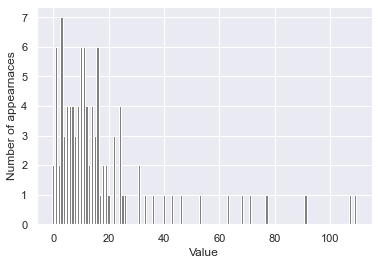

In [285]:
# longtail형태로 데이터 분포되있음
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearnaces")
plt.xlabel("Value")

In [286]:
from sklearn.linear_model import Ridge
# 기존의 longtail식으로 되있던 데이터 분포에서 성능점수 뽑아봄
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score : {:.3f}".format(score))

Test score : 0.709


In [287]:
# log변환하여 정규분포형태로 표현시도
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Value')

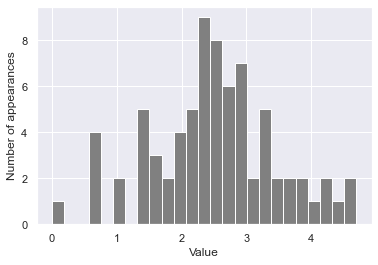

In [288]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [289]:
# log transform하면 더 높은 성능이 나오는게 일반적
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score : {:.3f}".format (score))

Test score : 0.889


## [Mean encoding] - Category 데이터에 쓸수 있음(One-hot Encoding처럼)
- Category 데이터는 항상 One-hot Encoding? -> X, 다양한 인코딩 기법이 있음
- 대표적인 방법으로 Y값에 대한 분포를 활용한 Mean Encoding이 사용됨
- 조금 더 빨리, 조금 더 나은 성능이 나오기도 했음(써봤더니 잘되더라 같은 느낌)

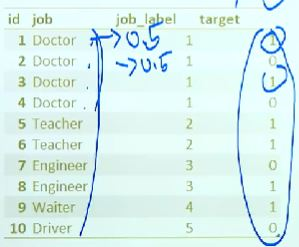

In [290]:
# 각 카테고리 값들의 이진분류된 값을 통해서 job_mean을 만든다
Image("C:/Users/hyun/workspace/TIL/MachineLearning/0_references/images/5_Meanencodingbefore.JPG")

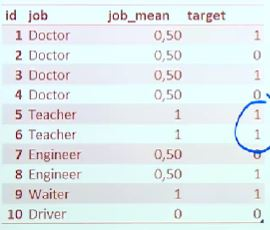

In [291]:
Image("C:/Users/hyun/workspace/TIL/MachineLearning/0_references/images/5_Meanencodingafter.JPG")

## [Mean encoding]
- Regression Task는 단순 평균값으로 입력
- Overfitting을 제거하기 위해 smoothing을 씀

In [292]:
DATA_DIR = "0_references/data/titanic"
data_files = reversed([os.path.join(DATA_DIR, filename) for filename in os.listdir(DATA_DIR)])
df_list = []
for filename in data_files:
    df_list.append(pd.read_csv(filename))

df = pd.concat(df_list, sort=False) 
df = df.reset_index(drop=True) 

number_of_train_dataset = df.Survived.notnull().sum() 
number_of_test_dataset = df.Survived.isnull().sum() 
y_true = df.pop("Survived")[:number_of_train_dataset] 

df["Age"] = df["Age"].fillna(
    df.groupby(["Pclass"])["Age"].transform("mean")
)

object_columns = ["PassengerId", "Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked"]
numeric_columns = ["Age", "SibSp", "Parch", "Fare"]

In [293]:
for col_name in object_columns:
    df[col_name] = df[col_name].astype(object)

for col_name in numeric_columns:
    df[col_name] = df[col_name].astype(float)
    
df["Parch"] = df["Parch"].astype(int)
df["SibSp"] = df["SibSp"].astype(int)

df.loc[61, "Embarked"] = "S"
df.loc[829, "Embarked"] = "S"

# df 2개를 inner로 merge해주는 함수
def merge_and_get(ldf, rdf, on, how="inner", index = None):
    if index is True:
        return pd.merge(ldf, rdf, how = how, left_index = True, right_index = True)
    else:
        return pd.merge(ldf, rdf, how = how, on = on)

one_hot_df = merge_and_get(df, pd.get_dummies(df["Sex"], prefix = "Sex"), on = None, index = True) # sex_modified
one_hot_df = merge_and_get(one_hot_df, pd.get_dummies(df["Pclass"], prefix = "Pclass"), on = None, index = True)
one_hot_df = merge_and_get(one_hot_df, pd.get_dummies(df["Embarked"], prefix = "Embarked"), on = None, index = True)
one_hot_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,NaN,S,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.283300,C85,C,1,0,1,0,0,1,0,0


In [294]:
temp_df = pd.merge(
    one_hot_df["Pclass"], y_true, left_index=True, right_index=True)
temp_df.groupby("Pclass")["Survived"].mean()

Pclass
1   0.629630
2   0.472826
3   0.242363
Name: Survived, dtype: float64

In [295]:
temp_df["Pclass"].replace(
    temp_df.groupby("Pclass")["Survived"].mean())

0     0.242363
1     0.629630
2     0.242363
3     0.629630
4     0.242363
        ...   
886   0.472826
887   0.629630
888   0.242363
889   0.629630
890   0.242363
Name: Pclass, Length: 891, dtype: float64

In [296]:
# Mean encoding 자동화
temp_columns = ["Sex", "Pclass", "Embarked"]

me_list = []
for col_name in temp_columns:
    temp_df = pd.merge(one_hot_df[col_name], y_true, left_index=True, right_index=True)
    temp_df["me_" + col_name] = temp_df[col_name].replace(temp_df.groupby(col_name)["Survived"].mean())

# 시각화
# sns.countplot(x=col_name, hue="Survived", data=temp_df)
# plt.show()
# sns.countplot(x="me_" + col_name, hue="Survived", data=temp_df)
# plt.show()

    me_list.append(temp_df.drop("Survived", axis=1))
temp_df = pd.merge(
    pd.concat(me_list, axis=1)[["me_" + col_name for col_name in temp_columns]],
    y_true, left_index=True, right_index=True)
temp_df

,me_Sex,me_Pclass,me_Embarked,Survived
0,0.188908,0.242363,0.339009,0.000000
1,0.742038,0.629630,0.553571,1.000000
2,0.742038,0.242363,0.339009,1.000000
3,0.742038,0.629630,0.339009,1.000000
4,0.188908,0.242363,0.339009,0.000000
...,...,...,...,...
886,0.188908,0.472826,0.339009,0.000000
887,0.742038,0.629630,0.339009,1.000000
888,0.742038,0.242363,0.339009,0.000000
889,0.188908,0.629630,0.553571,1.000000


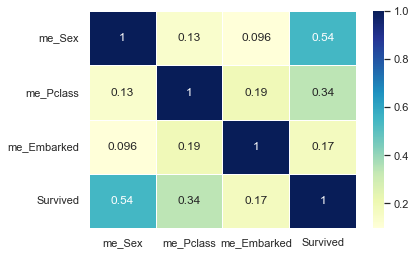

In [297]:
# Mean encoding된 애들끼리 corr도 구해보기
temp_df = pd.merge(
    pd.concat(me_list, axis=1)[["me_" + col_name for col_name in temp_columns]],
    y_true, left_index=True, right_index=True)
corr = temp_df.corr()
sns.set()
ax = sns.heatmap(corr, annot=True, linewidths=.5, cmap="YlGnBu")

In [298]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.816367,0,0,A.5. 3236,8.050000,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.900000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,24.816367,0,0,359309,8.050000,NaN,S


### Mean encoding
- 이외에도 많은 기법들 존재
- Backward Difference Contrast, BaseN, Binary, Count, Hashing 등등..!

## [Interaction features]
- 기존 feature들의 조합으로 새로운 feature를 생성
- Data에 대한 사전 지식과 이해 필요
- Polynomial feature를 사용한 자동화 기능 -> 높은비용
- 실험적으로 접근할 요소들은 있음 -> 자동화 코드 중요
- weight + time-period, sensor1 + sensor2

#### [Categorical Combination]
- Categorical한 feature들을 통해서 interaction해보자

In [299]:
DATA_DIR = "0_references/data/titanic"
data_files = reversed([os.path.join(DATA_DIR, filename) for filename in os.listdir(DATA_DIR)])
df_list = []
for filename in data_files:
    df_list.append(pd.read_csv(filename))
df = pd.concat(df_list, sort=False)
df = df.reset_index(drop=True)

y_true = df.pop("Survived")[:number_of_train_dataset]
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050000,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.900000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050000,NaN,S


In [300]:
temp_columns = ['Sex','Pclass','Embarked']
# 우선 one_hot_df에 새로운 열 만들어서 값 추가해줌
one_hot_df['Sex-Pclass'] = df['Sex'].map(str) + df['Pclass'].map(str)
one_hot_df['Embarked-Pclass'] = df['Embarked'].map(str) + df['Pclass'].map(str)

one_hot_df = merge_and_get(one_hot_df, pd.get_dummies(one_hot_df['Sex-Pclass'], prefix = 'SexPclass'), on=None, index= True)
one_hot_df = merge_and_get(one_hot_df, pd.get_dummies(one_hot_df['Embarked-Pclass'], prefix = 'EmbarkedPclass'), on=None, index= True)
one_hot_df.head(2)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,EmbarkedPclass_C1,EmbarkedPclass_C2,EmbarkedPclass_C3,EmbarkedPclass_Q1,EmbarkedPclass_Q2,EmbarkedPclass_Q3,EmbarkedPclass_S1,EmbarkedPclass_S2,EmbarkedPclass_S3,EmbarkedPclass_nan1
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,NaN,...,0,0,0,0,0,0,0,0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.283300,C85,...,1,0,0,0,0,0,0,0,0,0


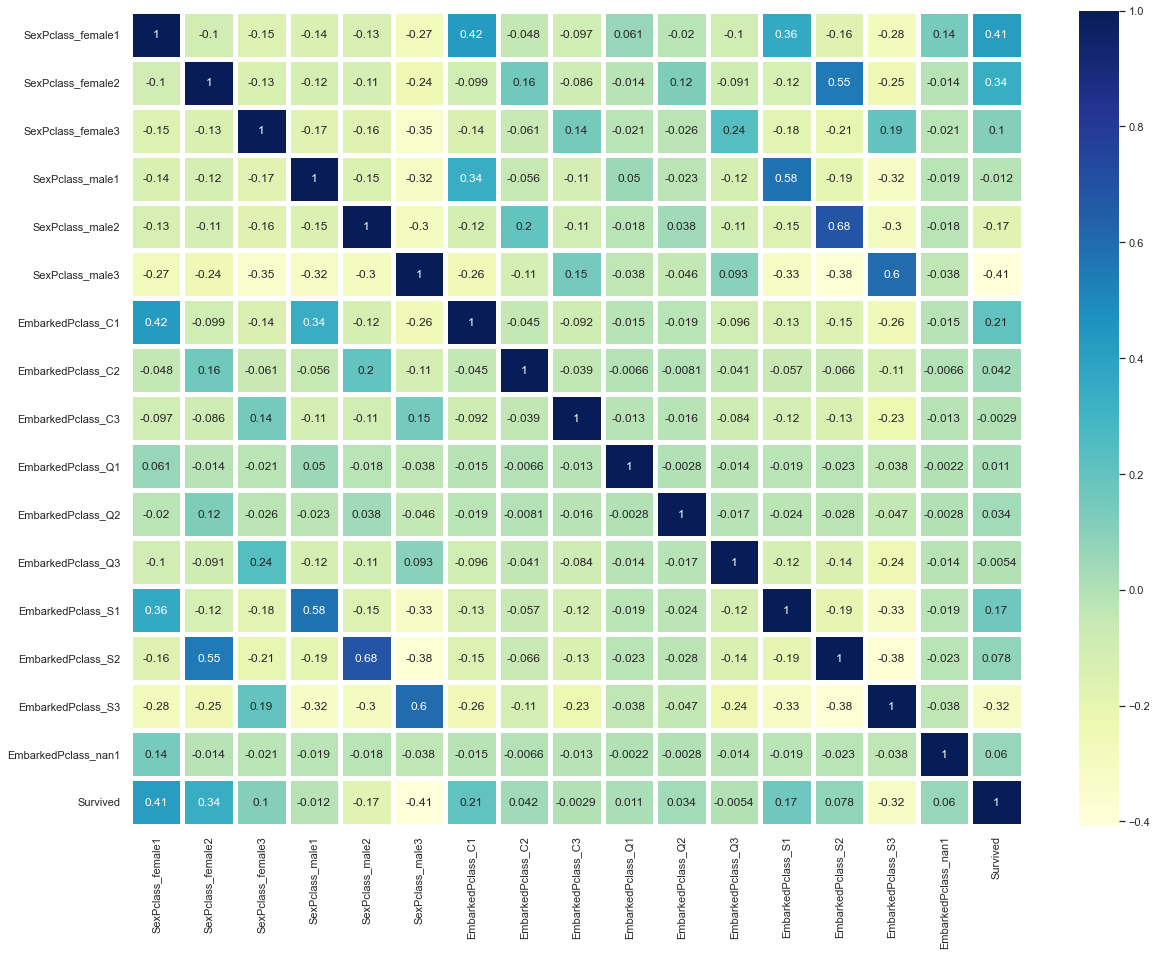

In [301]:
# 비교하고자 하는 열들을 쭉 뽑아서 crosscheck_columns에 넣어줌
crosscheck_columns = [col_name for col_name in one_hot_df.columns.tolist()
                        if col_name.split('_')[0] in ['SexPclass', 'EmbarkedPclass'] and '_' in col_name]
# corr 진행
temp_df = pd.merge(one_hot_df[crosscheck_columns], y_true, left_index=True, right_index=True)

corr = temp_df.corr()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot= True, linewidths=5, cmap='YlGnBu')

### [Etc]
- Feature끼리 더하기, 곱하기, 나누기 등등
- ! 왜 잘되는지 모르는데 잘되는 경우가 있음 !
- 도메인 지식과 EDA로 좋은 Feature들을 생성

## [Numeric data types]
- Numeric한 값들 통해서 interaction

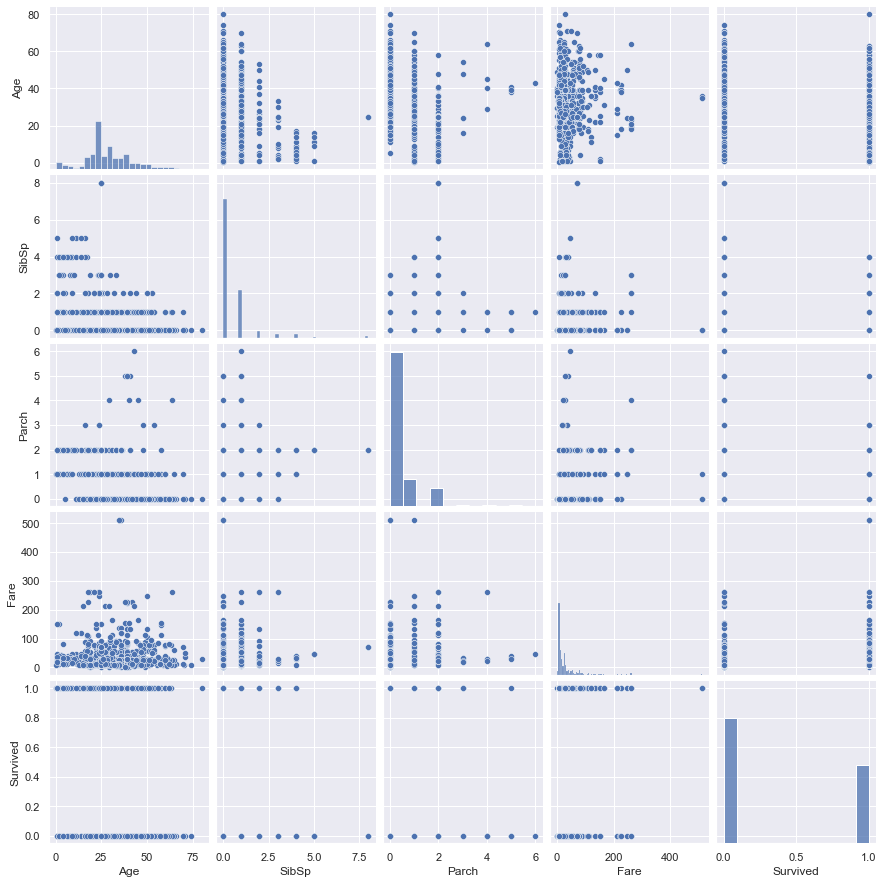

In [302]:
temp_df = pd.merge(one_hot_df[numeric_columns], y_true, left_index=True, right_index = True)

sns.pairplot(temp_df)

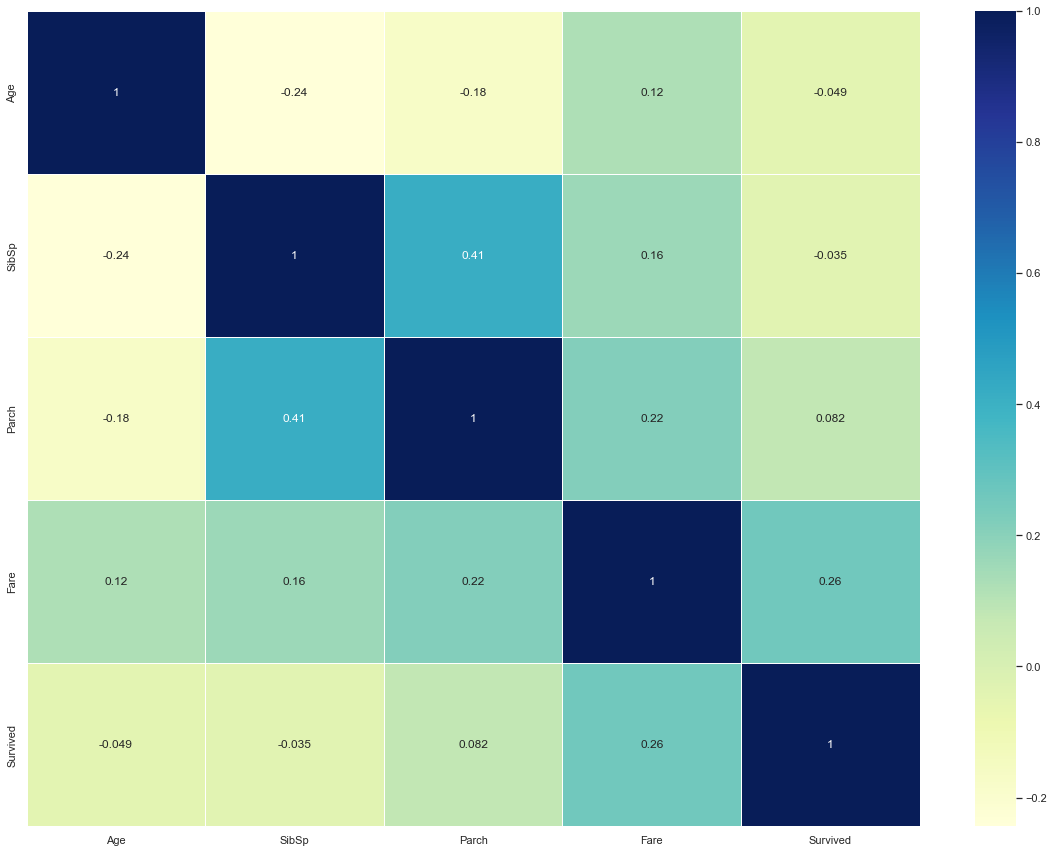

In [303]:
corr = temp_df.corr()
sns.set()
plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr, annot=True, linewidths=.8, cmap="YlGnBu")

<AxesSubplot:xlabel='SibSp', ylabel='Fare'>

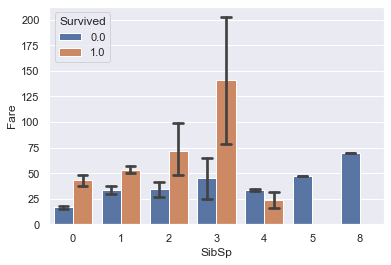

In [304]:
sns.barplot(x="SibSp", y="Fare", hue="Survived", data=temp_df, ci=68, capsize=.2)

<AxesSubplot:xlabel='Parch', ylabel='Fare'>

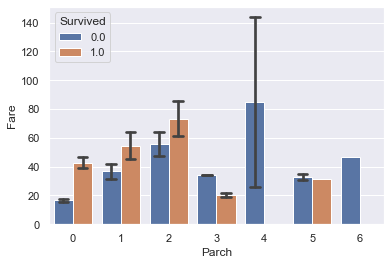

In [305]:
sns.barplot(x="Parch", y="Fare", hue="Survived", data=temp_df, ci=68, capsize=.2)

<AxesSubplot:xlabel='SibSp', ylabel='Age'>

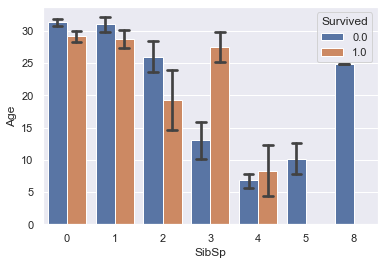

In [306]:
sns.barplot(x="SibSp", y="Age", hue="Survived", data=temp_df, ci=68, capsize=.2)

### [Binning]

In [307]:
one_hot_df["Fare"].value_counts()

8.050000     60
13.000000    59
7.750000     55
26.000000    50
7.895800     49
             ..
7.741700      1
8.158300      1
8.458300      1
7.800000      1
7.720800      1
Name: Fare, Length: 281, dtype: int64

<AxesSubplot:>

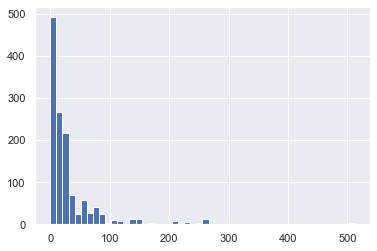

In [308]:
one_hot_df["Fare"].hist(bins=50)

In [309]:
one_hot_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,EmbarkedPclass_C1,EmbarkedPclass_C2,EmbarkedPclass_C3,EmbarkedPclass_Q1,EmbarkedPclass_Q2,EmbarkedPclass_Q3,EmbarkedPclass_S1,EmbarkedPclass_S2,EmbarkedPclass_S3,EmbarkedPclass_nan1
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,NaN,...,0,0,0,0,0,0,0,0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.283300,C85,...,1,0,0,0,0,0,0,0,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,NaN,...,0,0,0,0,0,0,0,0,1,0


### [Log Transform]

In [310]:
# copy
bin_one_hot_df = one_hot_df.copy()

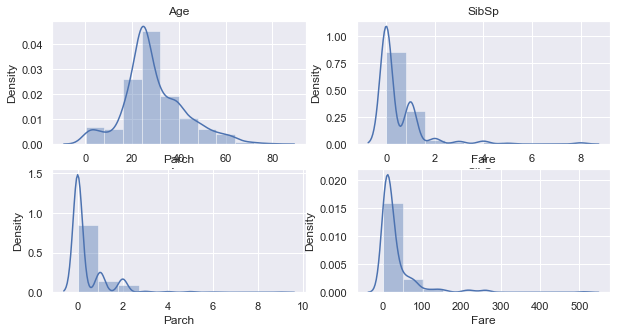

In [311]:
fig = plt.figure()
fig.set_size_inches(10, 5)

ax = []
for i, col_name in enumerate(numeric_columns):
    ax.append(fig.add_subplot(2, 2, i+1))
    X_1 = bin_one_hot_df[col_name]

    ax[i] = sns.distplot(X_1, bins = 10)
    ax[i].set_title(col_name)

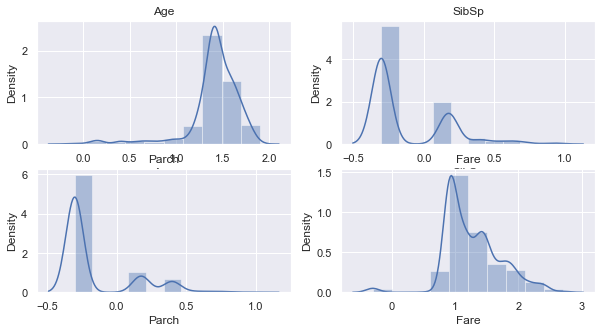

In [312]:
fig = plt.figure()
fig.set_size_inches(10,5)

ax = []
for i, col_name in enumerate(numeric_columns):
    ax.append(fig.add_subplot(2, 2, i+1)) #두개의 plot 생성
    X_1 = np.log10(one_hot_df[col_name] + 0.5)

    ax[i] = sns.distplot(X_1, bins=10)
    ax[i].set_title(col_name)

In [313]:
bin_one_hot_df.isnull().sum()


PassengerId               0
Pclass                    0
Name                      0
Sex                       0
Age                       0
SibSp                     0
Parch                     0
Ticket                    0
Fare                      1
Cabin                  1014
Embarked                  0
Sex_female                0
Sex_male                  0
Pclass_1                  0
Pclass_2                  0
Pclass_3                  0
Embarked_C                0
Embarked_Q                0
Embarked_S                0
Sex-Pclass                0
Embarked-Pclass           0
SexPclass_female1         0
SexPclass_female2         0
SexPclass_female3         0
SexPclass_male1           0
SexPclass_male2           0
SexPclass_male3           0
EmbarkedPclass_C1         0
EmbarkedPclass_C2         0
EmbarkedPclass_C3         0
EmbarkedPclass_Q1         0
EmbarkedPclass_Q2         0
EmbarkedPclass_Q3         0
EmbarkedPclass_S1         0
EmbarkedPclass_S2         0
EmbarkedPclass_S3   

In [314]:
bin_one_hot_df["Fare"] = bin_one_hot_df["Fare"].fillna(bin_one_hot_df["Fare"].mean())

In [315]:
log_bin_one_hot_df = merge_and_get(bin_one_hot_df, np.log10(bin_one_hot_df["Fare"] + 0.5), on = None, index = True)
log_bin_one_hot_df.rename(columns = {'Fare_x' : 'Fare',
                                     'Fare_y' : 'log_fare'},
                                     inplace = True)
log_bin_one_hot_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,EmbarkedPclass_C2,EmbarkedPclass_C3,EmbarkedPclass_Q1,EmbarkedPclass_Q2,EmbarkedPclass_Q3,EmbarkedPclass_S1,EmbarkedPclass_S2,EmbarkedPclass_S3,EmbarkedPclass_nan1,log_fare
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,NaN,...,0,0,0,0,0,0,0,1,0,0.889302
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.283300,C85,...,0,0,0,0,0,0,0,0,0,1.856023


In [316]:
object_columns

['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

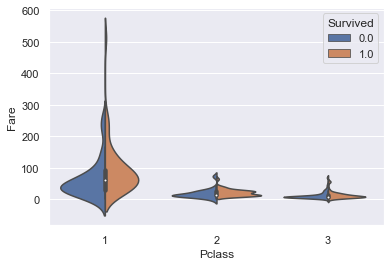

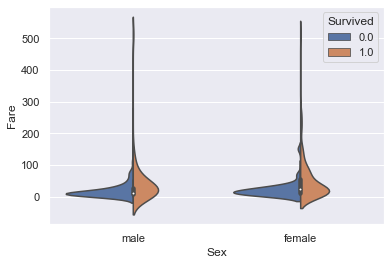

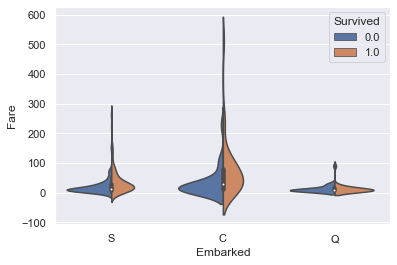

In [317]:
# 바이올린 플랏 같은경우에는 데이터의 분포를 보면서도 numeric 데이터와 category 데이터끼리도 비교가능
temp_df = pd.merge(log_bin_one_hot_df[numeric_columns + object_columns], y_true, left_index=True, right_index=True)

for col_name in ["Pclass", "Sex", "Embarked"]:
    sns.violinplot(x=col_name, y="Fare", hue="Survived", data=temp_df, split=True)
    plt.show()

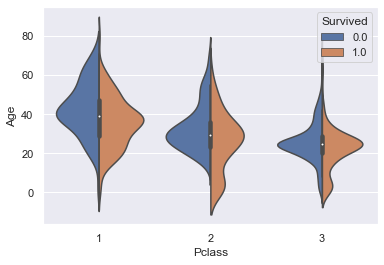

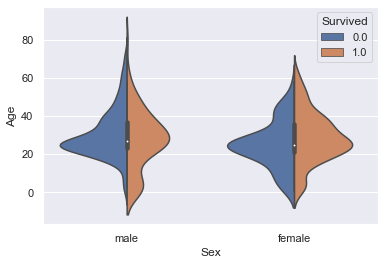

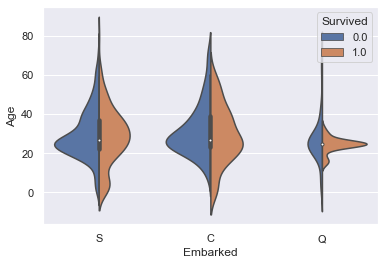

In [318]:
# EDA
temp_df = pd.merge(log_bin_one_hot_df[numeric_columns + object_columns], y_true, left_index=True, right_index=True)

for col_name in ["Pclass", "Sex", "Embarked"]:
    sns.violinplot(x=col_name, y="Age", hue="Survived", data=temp_df, split=True)
    plt.show()

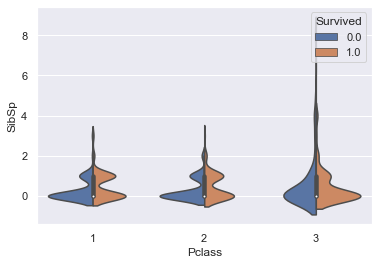

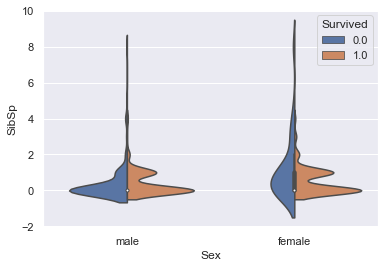

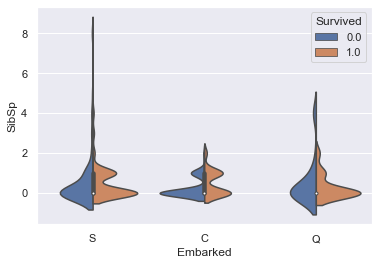

In [319]:
temp_df = pd.merge(log_bin_one_hot_df[numeric_columns + object_columns], y_true, left_index=True, right_index=True)

for col_name in ["Pclass", "Sex", "Embarked"]:
    sns.violinplot(x=col_name, y="SibSp", hue="Survived", data=temp_df, split=True)
    plt.show()

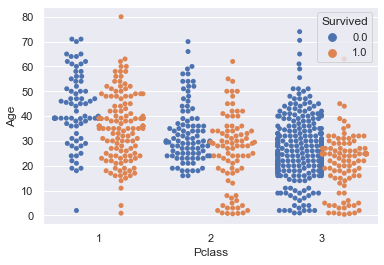

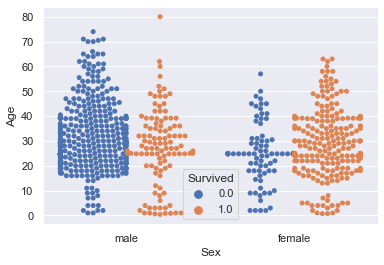

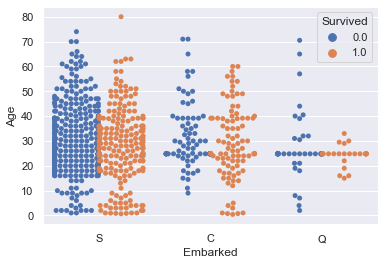

In [320]:
temp_df = pd.merge(log_bin_one_hot_df[numeric_columns + object_columns], y_true, left_index=True, right_index=True)

for col_name in ["Pclass", "Sex", "Embarked"]:
    sns.swarmplot(x=col_name, y="Age", hue="Survived", data=temp_df, split=True)
    plt.show()

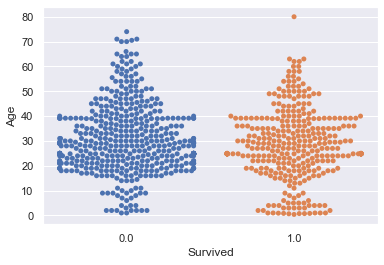

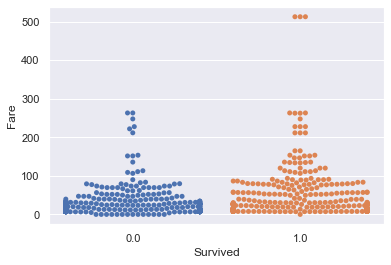

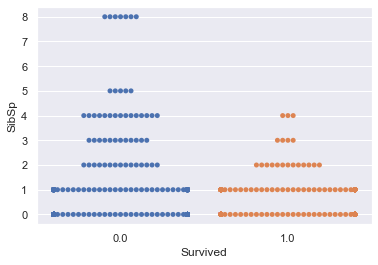

In [321]:
temp_df = pd.merge(log_bin_one_hot_df[numeric_columns + object_columns], y_true, left_index=True, right_index=True)

for col_name in ["Age", "Fare", "SibSp"]:
    sns.swarmplot(x="Survived", y=col_name, data=temp_df, split=True)
    plt.show()

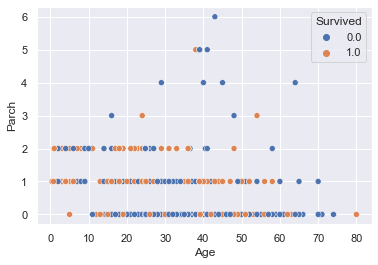

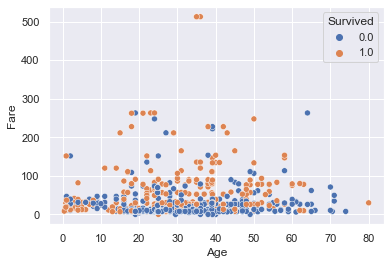

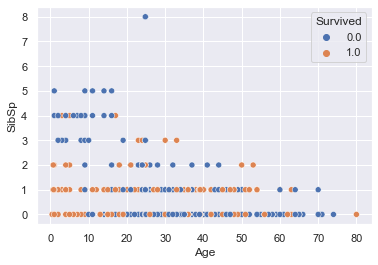

In [322]:
temp_df = pd.merge(log_bin_one_hot_df[numeric_columns + object_columns], y_true, left_index=True, right_index=True)

for col_name in ["Parch", "Fare", "SibSp"]:
    sns.scatterplot (x="Age", y=col_name, data=temp_df, hue="Survived")
    plt.show()

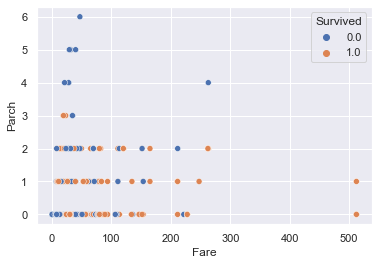

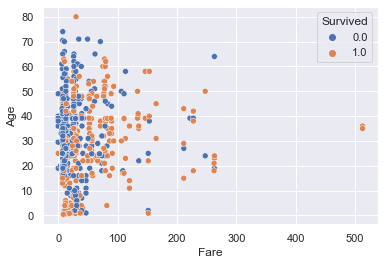

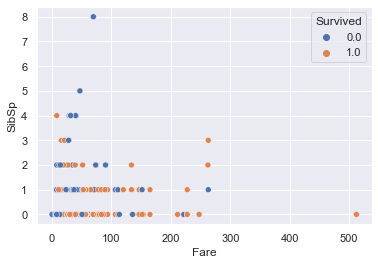

In [323]:
temp_df = pd.merge(log_bin_one_hot_df[numeric_columns + object_columns], y_true, left_index=True, right_index=True)

for col_name in ["Parch", "Age", "SibSp"]:
    sns.scatterplot(x="Fare", y=col_name, data=temp_df, hue="Survived")
    plt.show()

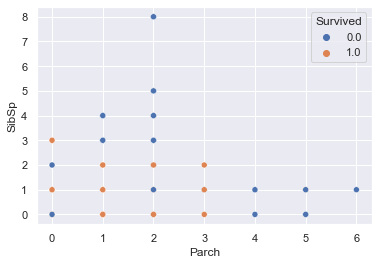

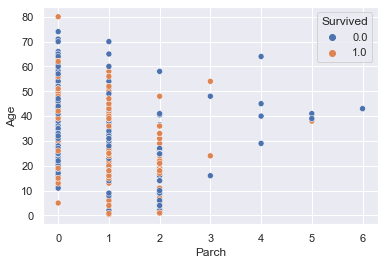

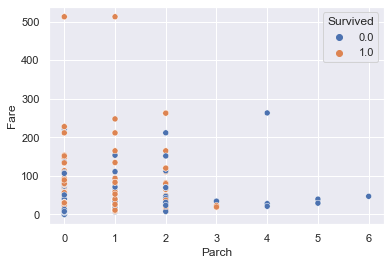

In [324]:
temp_df = pd.merge(log_bin_one_hot_df[numeric_columns + object_columns], y_true, left_index=True, right_index=True)

for col_name in ["SibSp", "Age", "Fare"]:
    sns.scatterplot(x="Parch", y=col_name, data=temp_df, hue="Survived")
    plt.show()

- PolynomialFeatures를 활용해서 numeric columns를 combination을 시켜주고 corr를 확인해본 heatmap
- feature수가 너무많아서 어디에 주목해야할지 헷갈림
- 그래서 다 신경쓰기보단 Survived에 대한 corr가 색이 진한 것들 위주로 봐야됨

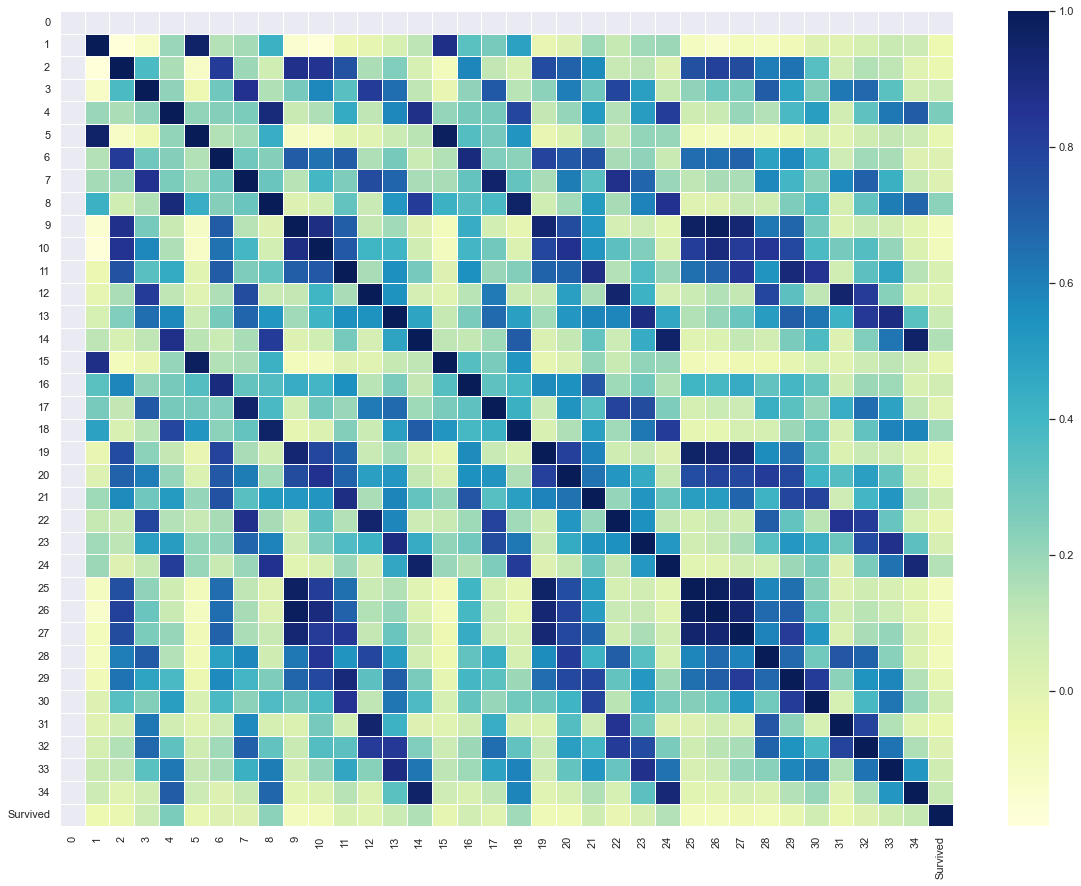

In [325]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 3)
X_poly = pd.DataFrame(
    poly_features.fit_transform(log_bin_one_hot_df[numeric_columns]))

temp_df = pd.concat([X_poly, y_true], axis = 1)
corr = temp_df.corr()
sns.set()
plt.subplots(figsize = (20, 15))
ax = sns.heatmap(corr, linewidths = 0.8, cmap = "YlGnBu")

### [String Handling]
- titanic 데이터 내에서의 String으로 구성된 feature를 다뤄보자

In [326]:
# 일단 Name열 안의 구성먼저 확인
from collections import Counter
Counter((log_bin_one_hot_df["Name"].str.lower() + " ").sum().split()).most_common(3)

[('mr.', 757), ('miss.', 260), ('mrs.', 197)]

In [327]:
# mr를 포함하고있느냐, miss를 포함하고 있느냐 등을 확인해서 새로운 feature 생성
log_bin_one_hot_df["is_mr"] = log_bin_one_hot_df["Name"].str.lower().str.contains(pat = "mr.")
log_bin_one_hot_df["is_miss"] = log_bin_one_hot_df["Name"].str.lower().str.contains(pat = "miss.")
log_bin_one_hot_df["is_mrs"] = log_bin_one_hot_df["Name"].str.lower().str.contains(pat = "mrs.")

In [328]:
# Ticket도 해보자
log_bin_one_hot_df["Ticket"]

0                A/5 21171
1                 PC 17599
2         STON/O2. 3101282
3                   113803
4                   373450
               ...        
1304             A.5. 3236
1305              PC 17758
1306    SOTON/O.Q. 3101262
1307                359309
1308                  2668
Name: Ticket, Length: 1309, dtype: object

In [329]:
# Ticket에도 어떤 의미가 있을지 split해서 보자
log_bin_one_hot_df["Ticket"].str.rsplit(expand=True,)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
1304,A.5.,3236,None
1305,PC,17758,None
1306,SOTON/O.Q.,3101262,None
1307,359309,None,None


In [330]:
# 그 중에서도 숫자정보만, 숫자에 어떤 의미가 있을까 확인해보자
log_bin_one_hot_df["Ticket"].str.extractall('(\d+)')

0
     match         
0    0            5
     1        21171
1    0        17599
2    0            2
     1      3101282
...             ...
1304 1         3236
1305 0        17758
1306 0      3101262
1307 0       359309
1308 0         2668

[1373 rows x 1 columns]

In [331]:
Counter((log_bin_one_hot_df["Ticket"].str.lower() + " ").sum().split()).most_common(30)

[('pc', 92),
 ('c.a.', 46),
 ('sc/paris', 16),
 ('soton/o.q.', 16),
 ('2.', 15),
 ('w./c.', 14),
 ('ston/o', 14),
 ('a/5', 12),
 ('ca.', 12),
 ('2343', 11),
 ('a/5.', 10),
 ('ca', 10),
 ('f.c.c.', 9),
 ('2144', 8),
 ('1601', 8),
 ('soton/oq', 8),
 ('c', 8),
 ('ston/o2.', 7),
 ('347082', 7),
 ('347077', 7),
 ('3101295', 7),
 ('s.o.c.', 7),
 ('14879', 7),
 ('17608', 7),
 ('s.o./p.p.', 7),
 ('382652', 6),
 ('19950', 6),
 ('347088', 6),
 ('113781', 6),
 ('a/4', 6)]

In [332]:
# 티켓 정보를 통해서 또 새로운 열 만들어냄
log_bin_one_hot_df["is_pc"] = log_bin_one_hot_df["Ticket"].str.lower().str.contains(pat = 'pc')
log_bin_one_hot_df["is_ca"] = log_bin_one_hot_df["Ticket"].str.lower().str.contains(pat = 'c.a.')
log_bin_one_hot_df["is_paris"] = log_bin_one_hot_df["Ticket"].str.lower().str.contains(pat = 'paris')
log_bin_one_hot_df["is_soton"] = log_bin_one_hot_df["Ticket"].str.lower().str.contains(pat = 'soton')
log_bin_one_hot_df["is_ston"] = log_bin_one_hot_df["Ticket"].str.lower().str.contains(pat = 'ston')
log_bin_one_hot_df["is_so"] = log_bin_one_hot_df["Ticket"].str.lower().str.contains(pat = 's.o')

In [333]:
log_bin_one_hot_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,log_fare,is_mr,is_miss,is_mrs,is_pc,is_ca,is_paris,is_soton,is_ston,is_so
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,NaN,...,0.889302,True,False,False,False,False,False,False,False,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.283300,C85,...,1.856023,True,False,True,True,False,False,False,False,False
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,NaN,...,0.925570,False,True,False,False,False,False,False,True,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,...,1.729165,True,False,True,False,False,False,False,False,False
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,NaN,...,0.931966,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.816367,0,0,A.5. 3236,8.050000,NaN,...,0.931966,True,False,False,False,False,False,False,False,False
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.900000,C105,...,2.039017,False,False,False,True,False,False,False,False,False
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.250000,NaN,...,0.889302,True,False,False,False,False,False,True,False,False
1307,1308,3,"Ware, Mr. Frederick",male,24.816367,0,0,359309,8.050000,NaN,...,0.931966,True,False,False,False,False,False,False,False,False


In [334]:
# 계속 비어있는 colunm이 있는지 없는지 확인해가면서
log_bin_one_hot_df.isnull().sum()

PassengerId               0
Pclass                    0
Name                      0
Sex                       0
Age                       0
SibSp                     0
Parch                     0
Ticket                    0
Fare                      0
Cabin                  1014
Embarked                  0
Sex_female                0
Sex_male                  0
Pclass_1                  0
Pclass_2                  0
Pclass_3                  0
Embarked_C                0
Embarked_Q                0
Embarked_S                0
Sex-Pclass                0
Embarked-Pclass           0
SexPclass_female1         0
SexPclass_female2         0
SexPclass_female3         0
SexPclass_male1           0
SexPclass_male2           0
SexPclass_male3           0
EmbarkedPclass_C1         0
EmbarkedPclass_C2         0
EmbarkedPclass_C3         0
EmbarkedPclass_Q1         0
EmbarkedPclass_Q2         0
EmbarkedPclass_Q3         0
EmbarkedPclass_S1         0
EmbarkedPclass_S2         0
EmbarkedPclass_S3   

In [335]:
# Cabin(짐칸)에 대해서도 해보자, 일단 빈칸은 9999로 채워서 진행
test = log_bin_one_hot_df["Cabin"].fillna("99999")
Counter((test.str.lower() + " ").sum().split()).most_common(30)

[('99999', 1014),
 ('f', 8),
 ('c23', 6),
 ('c25', 6),
 ('c27', 6),
 ('g6', 5),
 ('b57', 5),
 ('b59', 5),
 ('b63', 5),
 ('b66', 5),
 ('f33', 4),
 ('f2', 4),
 ('f4', 4),
 ('c78', 4),
 ('d', 4),
 ('c22', 4),
 ('c26', 4),
 ('b96', 4),
 ('b98', 4),
 ('e46', 3),
 ('b58', 3),
 ('b60', 3),
 ('e101', 3),
 ('e34', 3),
 ('a34', 3),
 ('c101', 3),
 ('b51', 3),
 ('b53', 3),
 ('b55', 3),
 ('c85', 2)]

In [336]:
log_bin_one_hot_df["is_cabin_none"] = test.str.contains(pat = "9999")
log_bin_one_hot_df["is_cabin_a"] = test.str.contains(pat = "a")
log_bin_one_hot_df["is_cabin_b"] = test.str.contains(pat = "b")
log_bin_one_hot_df["is_cabin_c"] = test.str.contains(pat = "c")
log_bin_one_hot_df["is_cabin_d"] = test.str.contains(pat = "d")
log_bin_one_hot_df["is_cabin_e"] = test.str.contains(pat = "e")
log_bin_one_hot_df["is_cabin_f"] = test.str.contains(pat = "f")
log_bin_one_hot_df["is_cabin_g"] = test.str.contains(pat = "g")

In [337]:
log_bin_one_hot_df.head(2).T

,0,1
PassengerId,1,2
Pclass,3,1
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th..."
Sex,male,female
Age,22.000000,38.000000
SibSp,1,1
Parch,0,0
Ticket,A/5 21171,PC 17599
Fare,7.250000,71.283300
Cabin,NaN,C85


In [338]:
log_bin_one_hot_df.isnull().sum()

PassengerId               0
Pclass                    0
Name                      0
Sex                       0
Age                       0
SibSp                     0
Parch                     0
Ticket                    0
Fare                      0
Cabin                  1014
Embarked                  0
Sex_female                0
Sex_male                  0
Pclass_1                  0
Pclass_2                  0
Pclass_3                  0
Embarked_C                0
Embarked_Q                0
Embarked_S                0
Sex-Pclass                0
Embarked-Pclass           0
SexPclass_female1         0
SexPclass_female2         0
SexPclass_female3         0
SexPclass_male1           0
SexPclass_male2           0
SexPclass_male3           0
EmbarkedPclass_C1         0
EmbarkedPclass_C2         0
EmbarkedPclass_C3         0
EmbarkedPclass_Q1         0
EmbarkedPclass_Q2         0
EmbarkedPclass_Q3         0
EmbarkedPclass_S1         0
EmbarkedPclass_S2         0
EmbarkedPclass_S3   

In [339]:
# 짐의 갯수가 몇개인지 세주는 함수
def count_cabin(x):
    if type(x) is int:
        return 0
    else:
        return len(x)
# 짐의갯수, 공백으로 split해주고 log까지 취해준 열도 추가
log_bin_one_hot_df["number_of_Cabin"] = log_bin_one_hot_df["Cabin"].str.split(" ").fillna(0).map(count_cabin)
log_bin_one_hot_df["log_number_of_Cabin"] = np.log(log_bin_one_hot_df["number_of_Cabin"] + 0.01)

<AxesSubplot:xlabel='number_of_Cabin', ylabel='count'>

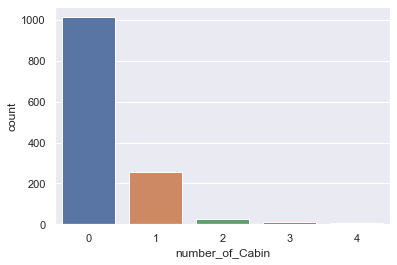

In [340]:
# 짐 없는경우가 제일 많음
sns.countplot(log_bin_one_hot_df["number_of_Cabin"])

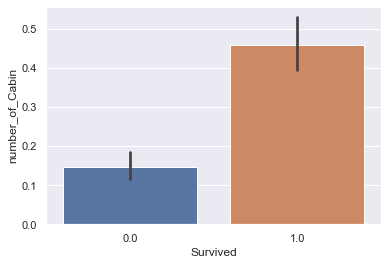

                     number_of_Cabin  log_number_of_Cabin  Survived
number_of_Cabin             1.000000             0.924291  0.277053
log_number_of_Cabin         0.924291             1.000000  0.314632
Survived                    0.277053             0.314632  1.000000


In [341]:
# 짐의 유무와 Survived관계를 알아봄
temp_df = pd.merge(log_bin_one_hot_df[["number_of_Cabin", "log_number_of_Cabin"]], y_true, left_index=True, right_index=True)
sns.barplot(x = "Survived", y = "number_of_Cabin", data = temp_df)
plt.show()
print(temp_df.corr())

## [Feature Selection]
- 이제 여태 많이 늘려온 feature들 중 가장 적합 한 특성을 선택해보자
- 너무 많은 feature들은 overfitting의 원인이 된다.
- 모델에 따라서 필요한 feature를 선택
- 필요없는 feature 제거 -> 학습 속도와 성능 향상
- 다양한 기법과 코드에 대해 공부해봐야됨

#### [feature 선택의 주의 사항들]
- prediction time에도 쓸수있는 feature인가?
- 실시간 예측이 필요할 때, 생성이 너무 고비용이 아닌가?(모델의 크기가 너무 크지않게)
- scale은 일정한가? 또는 비율적으로 표현 가능한가?
- 새롭게 등장하는 category data는? 가장 비슷한 것으로 해야할까?
- 너무 극단적인 분포는 -> threshold 기반으로 binarizatoin

#### [이런 Feature들은 삭제하자!]
- Correlation이 너무 높은 Feature는 삭제
- 전처리가 완료된 str feature들
- ID와 같은 성향을 가진 Feature들

## [Model & Training]

#### [데이터의 정리가 끝나면 학습하는 방법]
1. 적합한 모델을 선정한다(실험)
2. 모델에 적합한 하이퍼 파라메터를 선정한다(실험)
3. 다양한 전처리 경우의 수를 입력한다(실험)
4. 학습을 실행한다.
5. 성능을 평가한다.(Acc, RMSE 등)

##### [Feature Elimination]

In [342]:
# 얘네들 중에서 필요없는애들 하나씩 없애려고 한다
features = log_bin_one_hot_df.columns.tolist()
features

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Sex_female',
 'Sex_male',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Sex-Pclass',
 'Embarked-Pclass',
 'SexPclass_female1',
 'SexPclass_female2',
 'SexPclass_female3',
 'SexPclass_male1',
 'SexPclass_male2',
 'SexPclass_male3',
 'EmbarkedPclass_C1',
 'EmbarkedPclass_C2',
 'EmbarkedPclass_C3',
 'EmbarkedPclass_Q1',
 'EmbarkedPclass_Q2',
 'EmbarkedPclass_Q3',
 'EmbarkedPclass_S1',
 'EmbarkedPclass_S2',
 'EmbarkedPclass_S3',
 'EmbarkedPclass_nan1',
 'log_fare',
 'is_mr',
 'is_miss',
 'is_mrs',
 'is_pc',
 'is_ca',
 'is_paris',
 'is_soton',
 'is_ston',
 'is_so',
 'is_cabin_none',
 'is_cabin_a',
 'is_cabin_b',
 'is_cabin_c',
 'is_cabin_d',
 'is_cabin_e',
 'is_cabin_f',
 'is_cabin_g',
 'number_of_Cabin',
 'log_number_of_Cabin']

##### ! 다른이름으로 할당할 때도 copy활용하는게 좋다, 혹시나 데이터가 같이 변형될까봐 !

In [343]:
all_df = log_bin_one_hot_df.copy(deep=True)

# 이미 전처리된 str타입의 feature들 제거
elimination_features = ['PassengerId', 'Name', 'Cabin', 'Ticket']
for col_name in elimination_features:
    all_df.drop(col_name, axis=1, inplace=True)

In [344]:
# del 활용해줘도됨
del all_df["Sex"]
del all_df["Pclass"]
del all_df["Embarked"]
del all_df["Sex-Pclass"]
del all_df["Embarked-Pclass"]
del all_df["Pclass_2"]

In [345]:
all_df.head(2)

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_3,Embarked_C,Embarked_Q,...,is_cabin_none,is_cabin_a,is_cabin_b,is_cabin_c,is_cabin_d,is_cabin_e,is_cabin_f,is_cabin_g,number_of_Cabin,log_number_of_Cabin
0,22.000000,1,0,7.250000,0,1,0,1,0,0,...,True,False,False,False,False,False,False,False,0,-4.605170
1,38.000000,1,0,71.283300,1,0,1,0,1,0,...,False,False,False,False,False,False,False,False,1,0.009950


In [346]:
# train, test 데이터 나눔
X_train = all_df[:number_of_train_dataset].values
X_test = all_df[:number_of_train_dataset].values
y_train = y_true.copy()

In [347]:
X_train.shape

(891, 47)

In [348]:
# RFE : Recursive Feature Engineering : 필요없는 feature들 알아서 걸러줌
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = RFE(RandomForestClassifier(n_estimators = 100))

select.fit(X_train, y_train)

# transform training set
X_train_selected = select.transform(X_train)
X_train_selected.shape

(891, 23)

In [349]:
# 살아남은 feature이름들
all_df.columns[select.get_support()]

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Pclass_3',
       'Embarked_C', 'Embarked_S', 'SexPclass_female1', 'SexPclass_female2',
       'SexPclass_female3', 'SexPclass_male2', 'SexPclass_male3',
       'EmbarkedPclass_S3', 'log_fare', 'is_mr', 'is_miss', 'is_mrs', 'is_so',
       'is_cabin_none', 'number_of_Cabin', 'log_number_of_Cabin'],
      dtype='object')

In [350]:
# X_train의 값을 input으로 할 모델을 만들어줌

# 걸리지지않은 y와 걸러진 y둘의 성능을 비교해보자
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators = 100, max_depth = 20, random_state = 0)

In [351]:
# feature가 제거되기 전 X_train 값으로 fitting
clf.fit(X_train, y_train)

# feature가 제거되기 전 X_test 값으로 prediction
idx = (all_df[number_of_train_dataset:].index+1).tolist()
y_pred = clf.predict((X_test))

# feature가 제거된 후 X_train_selcected값으로 fitting
clf.fit(X_train_selected, y_train)

# feature가 제거된 후 X_test값으로 prediction
idx = (all_df[number_of_train_dataset:].index+1).tolist()
y_pred_elim = clf.predict(select.transform(X_test))
y_pred_elim

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0.

In [352]:
submission_columns = ["Passengerid", "Survived"]

# feature 제거 전
submission_df = pd.DataFrame( [idx.y_pre]).T
submission_df.columns = submission_columns
for col_name in submission_columns:
    submission_df[col_name] = submission_df[col_name].astype(int)
submission_df.to_csv("submission.csv", index=False)

# feature 제거 후
submission_df = pd.DataFrame([idx, y_pred_elim]).T
submission_df.columns = submission_columns
for col_name in submission_columns:
    submission_df[col_name] = submission_df[col_name].astype(int)
submission_df.to_csv("submission_elim.csv", index = False)

AttributeError: 'list' object has no attribute 'y_pre'